In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
spams = pd.read_csv("C:\\Users\\hlala\\Downloads\\spam.csv", encoding="latin-1")
#/Users/da_learner_mac_45/Downloads
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spams.shape

(5572, 5)

In [6]:
spams.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Name the columns accordingly

In [7]:
spams.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
non_spam_ratio = round(len(spams[spams['v1'] == 0])/len(spams['v1']) * 100, 2)
spam_ratio = round(len(spams[spams['v1'] == 1])/len(spams['v1']) * 100, 2)

# Print the ratios
print("Not a Spam Email Ratio with label(0):", non_spam_ratio, "%")
print("Spam Email Ratio with label(1):", spam_ratio, "%")

Not a Spam Email Ratio with label(0): 0.0 %
Spam Email Ratio with label(1): 0.0 %


In [9]:
spams['length'] = spams.v2.str.len()
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


DATA ANALYSIS

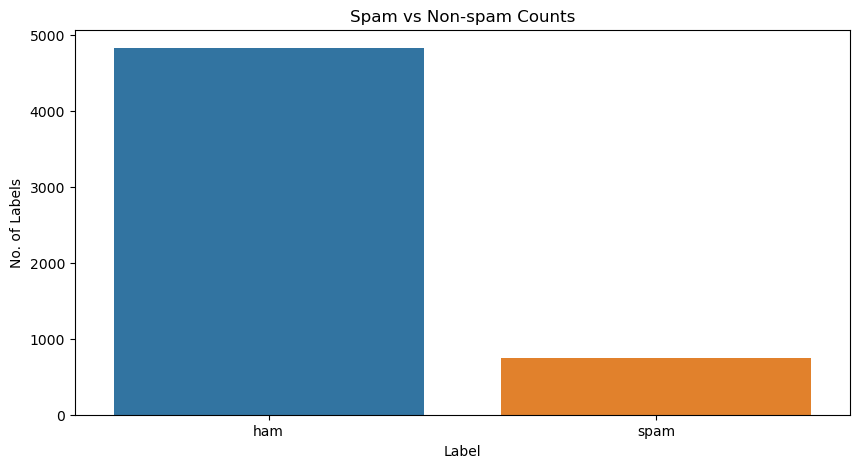

In [11]:

plt.figure(figsize=(10,5))
sns.countplot(x='v1', data=spams)
plt.xlabel('Label')
plt.ylabel('No. of Labels')
plt.title('Spam vs Non-spam Counts')
plt.show()

In [12]:
spams['label'] = spams['v1'].map({'ham': 0, 'spam': 1})
spams['message']=spams['v2']
spams.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','v1','v2'], axis=1, inplace=True)
spams.head()


,length,label,message
0,111,0,"Go until jurong point, crazy.. Available only ..."
1,29,0,Ok lar... Joking wif u oni...
2,155,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,49,0,U dun say so early hor... U c already then say...
4,61,0,"Nah I don't think he goes to usf, he lives aro..."


BALANCE DATA

In [23]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hlala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
spams['num_characters']=spams['message'].apply(len)
spams.head()

,length,label,message,num_characters
0,111,0,"Go until jurong point, crazy.. Available only ...",111
1,29,0,Ok lar... Joking wif u oni...,29
2,155,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,49,0,U dun say so early hor... U c already then say...,49
4,61,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
from nltk.tokenize import word_tokenize
spams['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [27]:
spams['num_words']=spams['message'].apply(lambda x:len(nltk.word_tokenize(x)))
spams.sample(5)

,length,label,message,num_characters,num_words
1310,103,0,"I.ll always be there, even if its just in spir...",103,27
3588,123,0,I've sent my wife your text. After we buy them...,123,32
1674,25,0,Nah dub but je still buff,25,6
4810,86,0,E admin building there? I might b slightly ear...,86,20
5020,19,0,:-( sad puppy noise,19,6


In [28]:
spams['num_sentences']=spams['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [13]:
ham=spams[spams["label"]==0]
spam=spams[spams["label"]==1]

<AxesSubplot:>

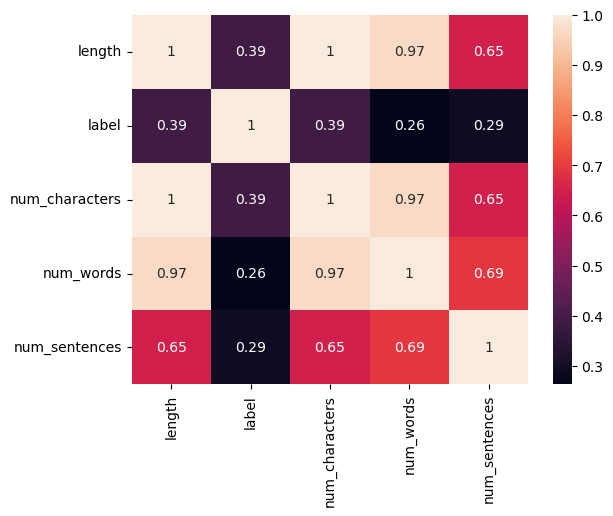

In [29]:
#plotting a heatmap for the correlation
sns.heatmap(spams.corr(),annot=True)

In [14]:
ham.shape,spam.shape

((4825, 3), (747, 3))

In [15]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 3)

In [16]:
data=spam.append(ham,ignore_index=True)
print("Shape :",data.shape)
data.head()

Shape : (1494, 3)


C:\Users\hlala\AppData\Local\Temp\ipykernel_2036\1966939139.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=spam.append(ham,ignore_index=True)


,length,label,message
0,155,1,Free entry in 2 a wkly comp to win FA Cup fina...
1,148,1,FreeMsg Hey there darling it's been 3 week's n...
2,158,1,WINNER!! As a valued network customer you have...
3,154,1,Had your mobile 11 months or more? U R entitle...
4,136,1,"SIX chances to win CASH! From 100 to 20,000 po..."


c:\Users\hlala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

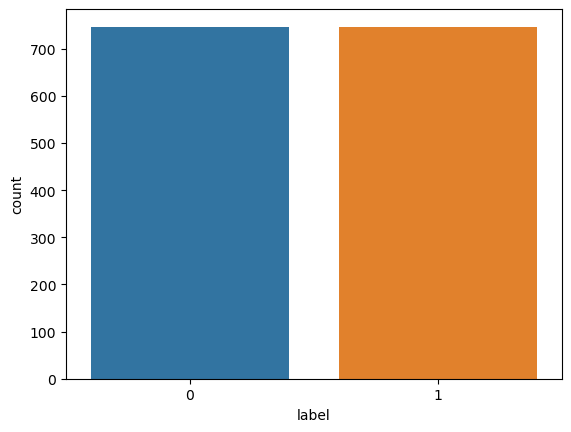

In [17]:
sns.countplot(data["label"])

In [30]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hlala\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


179

In [31]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from nltk.stem import LancasterStemmer, SnowballStemmer

# Define stemmers
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')

# Define vectorizers
tfidf = TfidfVectorizer(stop_words='english', tokenizer=lambda text: snowball.stem(lancaster.stem(text)))
hashing = HashingVectorizer(stop_words='english', tokenizer=lambda text: snowball.stem(lancaster.stem(text)))

# Generate feature vectors
X_tfidf = tfidf.fit_transform(spam['message'])
X_hashing = hashing.fit_transform(spam['message'])
y = spams['label']


c:\Users\hlala\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\hlala\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


WORD CLOUD

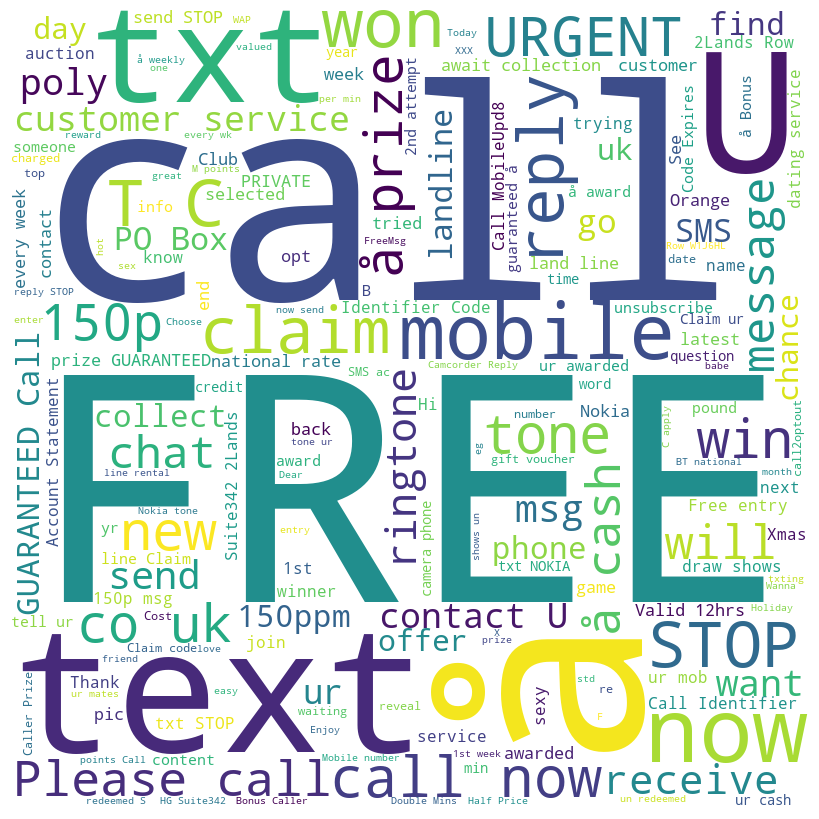

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single string
all_messages = ' '.join(spam['message'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_messages)

# Plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


MODEL BUILDING

In [19]:
# Preprocess the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam.message)
y = spam.label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate the model
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



CLASSIFICATION REPORT

In [20]:
# Evaluate the model on the training set
y_train_pred = nb.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       597

    accuracy                           1.00       597
   macro avg       1.00      1.00      1.00       597
weighted avg       1.00      1.00      1.00       597



In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



CONFUSION MATRIX

Confusion matrix:
 [[150]]


C:\Users\hlala\AppData\Local\Temp\ipykernel_2036\515965696.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\hlala\AppData\Local\Temp\ipykernel_2036\515965696.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


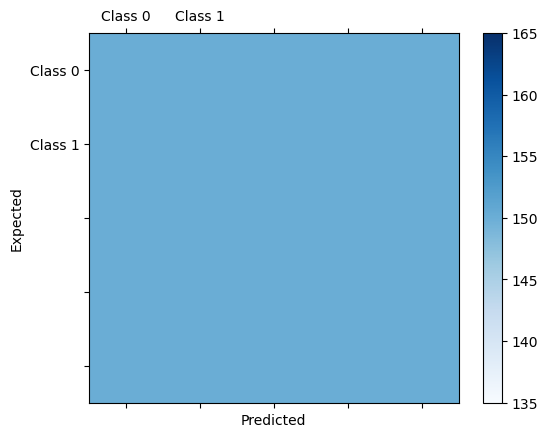

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()